In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("fic_epita_kantar_codes.csv", sep=";", encoding="latin-1")  # ou encoding="iso-8859-1"
variables_orange = ["A9_1_slice",
                    "A9_2_slice",
                    "A9_3_slice",
                    "A9_4_slice",
                    "A9_5_slice",
                    "A9_6_slice",
                    "A9_7_slice",
                    "A9_8_slice",
                    "A9_9_slice",
                    "A9_10_slice",
                    "A9_11_slice",
                    "A9_12_slice",
                    "A9_13_slice",
                    "A9_14_slice",
                    "A9_15_slice",
                    "A9_16_slice",
                    "A10_1_slice",
                    "A10_2_slice",
                    "A10_3_slice",
                    "A10_4_slice",
                    "A10_5_slice",
                    "A10_6_slice",
                    "A10_7_slice",
                    "A10_8_slice",
                    "A11_1_slice",
                    "A11_2_slice",
                    "A11_3_slice",
                    "A11_4_slice",
                    "A11_5_slice",
                    "A11_6_slice",
                    "A11_7_slice",
                    "A11_8_slice",
                    "A11_9_slice",
                    "A11_10_slice",
                    "A11_11_slice",
                    "A11_12_slice",
                    "A11_13_slice",
                    ]
variables_vert = ["A11", "A12", "A13", "A14", "A4", "A5", "A5bis",
                  "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice",
                  "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice",
                  "B3", "B4", "B6", "C1_1_slice", "C1_2_slice", "C1_3_slice", 
                  "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice", 
                  "C1_8_slice", "C1_9_slice"]

In [12]:
data_orange = data[variables_orange]
data_vert = data[variables_vert]
print(data_orange.shape)
print(data_vert.shape)

(5000, 37)
(5000, 27)


In [13]:
#print(data_vert.head())
# If a column has NaN values, fill them with the mean of the column
data_vert = data_vert.fillna(data_vert.mean())
print(data_vert.head())


   A11  A12  A13  A14  A4        A5     A5bis  A8_1_slice  A8_2_slice  \
0    1    0    0    0   1  2.000000  1.821206           2           2   
1    1    0    0    0   1  5.000000  1.821206           2           0   
2    1    0    0    0   1  2.000000  1.821206           5           5   
3    1    1    1    0   1  1.000000  1.821206           2           3   
4    0    1    0    0   2  2.326399  1.000000           1           1   

   A8_3_slice  ...  B6  C1_1_slice  C1_2_slice  C1_3_slice  C1_4_slice  \
0           2  ...   3           2           2           2           2   
1           0  ...   3           4           4           4           4   
2           1  ...   4           4           4           4           4   
3           2  ...   4           4           4           5           5   
4           1  ...   3           4           4           4           4   

   C1_5_slice  C1_6_slice  C1_7_slice  C1_8_slice  C1_9_slice  
0           2           2           2           2   

In [14]:

# Standardiser les données
scaler = StandardScaler()
data_orange_scaled = scaler.fit_transform(data_orange)
data_vert_scaled = scaler.fit_transform(data_vert)


# Fonction pour effectuer le clustering
def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    silhouette = silhouette_score(data, clusters)
    return clusters, kmeans, silhouette

# Clustering pour les deux groupes de variables
clusters_orange, kmeans_orange, silhouette_orange = perform_clustering(data_orange_scaled, 4)
clusters_vert, kmeans_vert, silhouette_vert = perform_clustering(data_vert_scaled, 5)

print(f"Silhouette Score (Orange): {silhouette_orange}")
print(f"Silhouette Score (Vert): {silhouette_vert}")

Silhouette Score (Orange): 0.10744180434504633
Silhouette Score (Vert): 0.1455179980633828


## Visualisation des clusters

Affichage du nombre d'éléments dans chaque clusters 

In [15]:
print(f"Nombre d'éléments dans chaque cluster (Orange): {np.bincount(clusters_orange)}")
print(f"Nombre d'éléments dans chaque cluster (Vert): {np.bincount(clusters_vert)}")

Nombre d'éléments dans chaque cluster (Orange): [1157  355 1464 2024]
Nombre d'éléments dans chaque cluster (Vert): [1340  323 2012  949  376]


Visualisation des clusters sur un graphique 2D


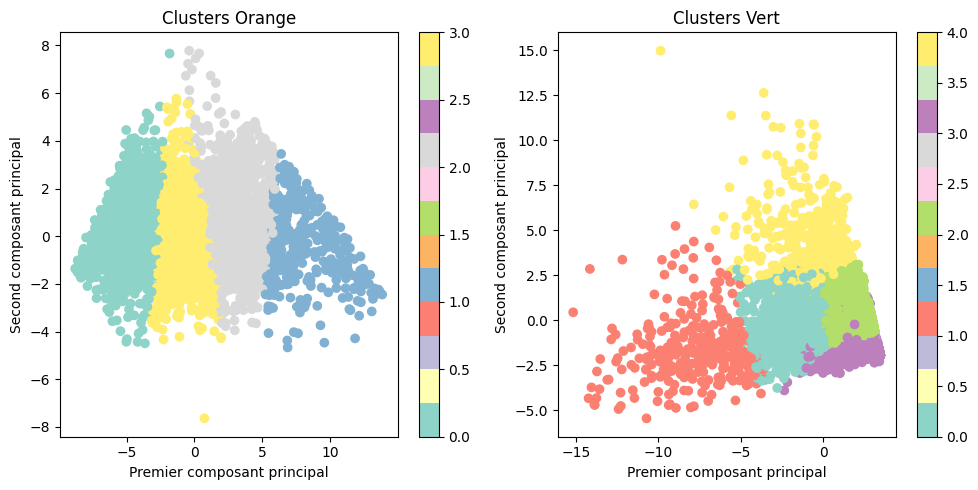

In [16]:
# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=2)

# Pour les données orange
pca_orange = pca.fit_transform(data_orange_scaled)
plt.figure(figsize=(10, 5))

# Plot des clusters orange
plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_orange[:, 0], pca_orange[:, 1], c=clusters_orange, cmap='Set3')
plt.title('Clusters Orange')
plt.xlabel('Premier composant principal')
plt.ylabel('Second composant principal')
plt.colorbar(scatter)

# Pour les données vertes
pca_vert = pca.fit_transform(data_vert_scaled)

# Plot des clusters verts
plt.subplot(1, 2, 2)
scatter = plt.scatter(pca_vert[:, 0], pca_vert[:, 1], c=clusters_vert, cmap='Set3')
plt.title('Clusters Vert')
plt.xlabel('Premier composant principal')
plt.ylabel('Second composant principal')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

Visualisation des clusters sur un graphique 3D

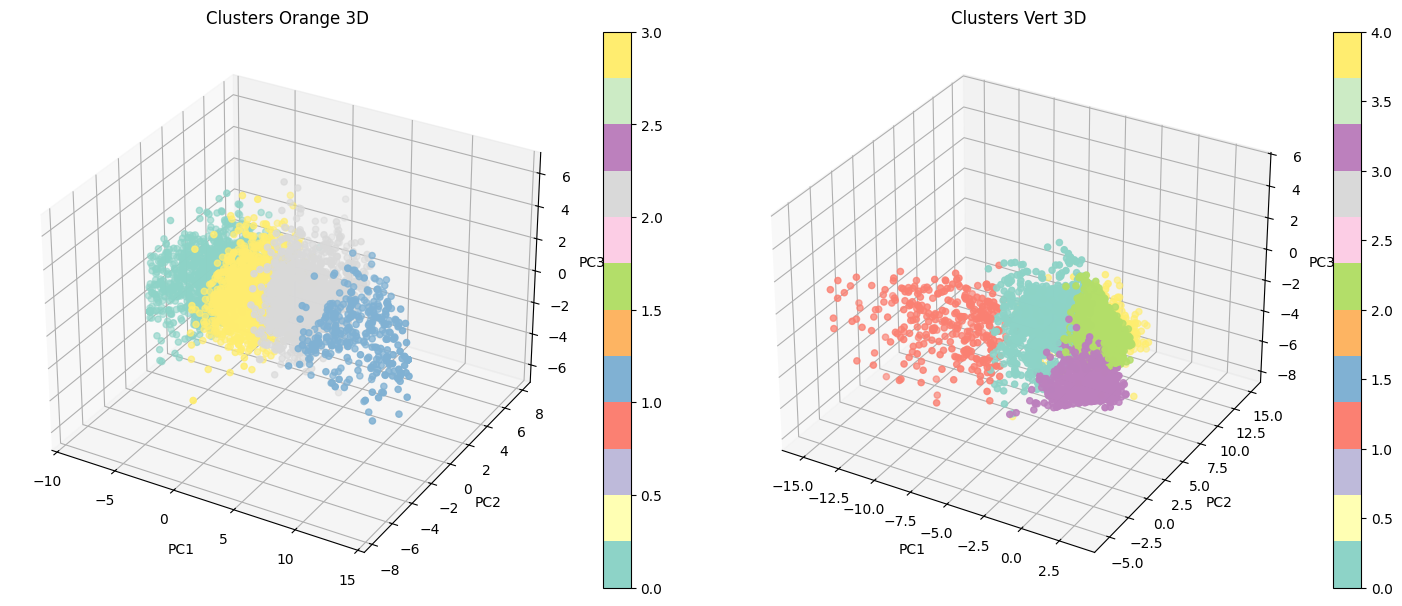

' try:\n    import plotly.express as px\n    \n    # Pour les clusters orange\n    df_orange = pd.DataFrame(pca_orange_3d, columns=[\'PC1\', \'PC2\', \'PC3\'])\n    df_orange[\'Cluster\'] = clusters_orange\n    fig_orange = px.scatter_3d(df_orange, x=\'PC1\', y=\'PC2\', z=\'PC3\',\n                              color=\'Cluster\', title=\'Clusters Orange 3D\')\n    fig_orange.show()\n    \n    # Pour les clusters verts\n    df_vert = pd.DataFrame(pca_vert_3d, columns=[\'PC1\', \'PC2\', \'PC3\'])\n    df_vert[\'Cluster\'] = clusters_vert\n    fig_vert = px.scatter_3d(df_vert, x=\'PC1\', y=\'PC2\', z=\'PC3\',\n                            color=\'Cluster\', title=\'Clusters Vert 3D\')\n    fig_vert.show()\nexcept ImportError:\n    print("Pour une visualisation interactive, installez plotly avec: pip install plotly") '

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Réduction de dimension avec PCA pour la visualisation 3D (3 composantes)
pca = PCA(n_components=3)

# Pour les données orange
pca_orange_3d = pca.fit_transform(data_orange_scaled)
fig = plt.figure(figsize=(15, 6))

# Plot 3D des clusters orange
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(pca_orange_3d[:, 0], 
                     pca_orange_3d[:, 1], 
                     pca_orange_3d[:, 2],
                     c=clusters_orange,
                     cmap='Set3')
ax1.set_title('Clusters Orange 3D')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
plt.colorbar(scatter)

# Pour les données vertes
pca_vert_3d = pca.fit_transform(data_vert_scaled)

# Plot 3D des clusters verts
ax2 = fig.add_subplot(122, projection='3d')
scatter = ax2.scatter(pca_vert_3d[:, 0], 
                     pca_vert_3d[:, 1], 
                     pca_vert_3d[:, 2],
                     c=clusters_vert,
                     cmap='Set3')
ax2.set_title('Clusters Vert 3D')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Ajout d'une visualisation interactive (optionnel)
""" try:
    import plotly.express as px
    
    # Pour les clusters orange
    df_orange = pd.DataFrame(pca_orange_3d, columns=['PC1', 'PC2', 'PC3'])
    df_orange['Cluster'] = clusters_orange
    fig_orange = px.scatter_3d(df_orange, x='PC1', y='PC2', z='PC3',
                              color='Cluster', title='Clusters Orange 3D')
    fig_orange.show()
    
    # Pour les clusters verts
    df_vert = pd.DataFrame(pca_vert_3d, columns=['PC1', 'PC2', 'PC3'])
    df_vert['Cluster'] = clusters_vert
    fig_vert = px.scatter_3d(df_vert, x='PC1', y='PC2', z='PC3',
                            color='Cluster', title='Clusters Vert 3D')
    fig_vert.show()
except ImportError:
    print("Pour une visualisation interactive, installez plotly avec: pip install plotly") """

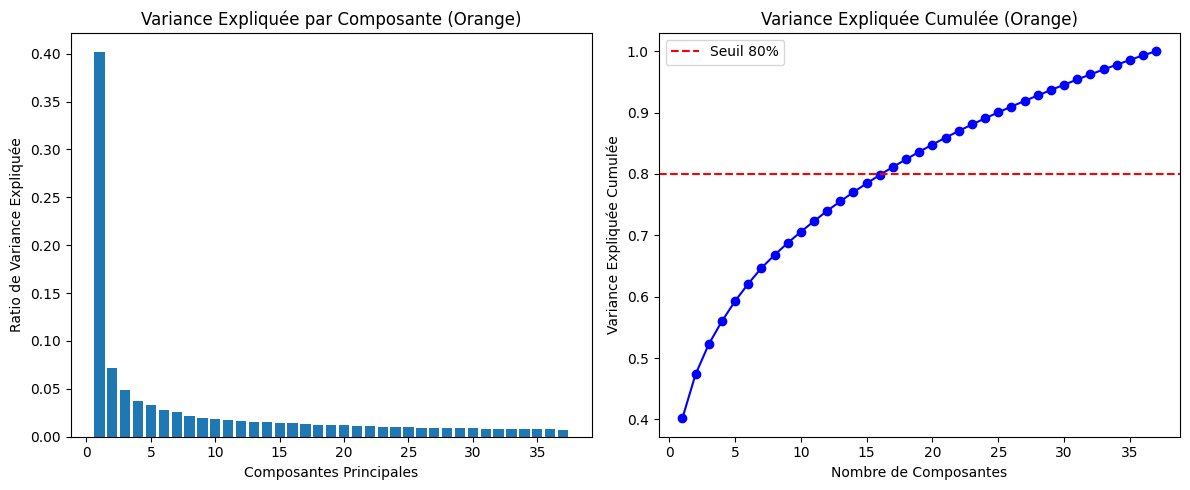


Importance des composantes principales (Orange):
PC1: 0.402 (40.2%)
PC2: 0.072 (7.2%)
PC3: 0.049 (4.9%)
PC4: 0.038 (3.8%)
PC5: 0.033 (3.3%)
PC6: 0.028 (2.8%)
PC7: 0.026 (2.6%)
PC8: 0.021 (2.1%)
PC9: 0.020 (2.0%)
PC10: 0.018 (1.8%)
PC11: 0.017 (1.7%)
PC12: 0.017 (1.7%)
PC13: 0.016 (1.6%)
PC14: 0.015 (1.5%)
PC15: 0.014 (1.4%)
PC16: 0.014 (1.4%)
PC17: 0.013 (1.3%)
PC18: 0.012 (1.2%)
PC19: 0.012 (1.2%)
PC20: 0.012 (1.2%)
PC21: 0.011 (1.1%)
PC22: 0.011 (1.1%)
PC23: 0.011 (1.1%)
PC24: 0.010 (1.0%)
PC25: 0.010 (1.0%)
PC26: 0.009 (0.9%)
PC27: 0.009 (0.9%)
PC28: 0.009 (0.9%)
PC29: 0.009 (0.9%)
PC30: 0.009 (0.9%)
PC31: 0.009 (0.9%)
PC32: 0.008 (0.8%)
PC33: 0.008 (0.8%)
PC34: 0.008 (0.8%)
PC35: 0.008 (0.8%)
PC36: 0.008 (0.8%)
PC37: 0.007 (0.7%)

Variables les plus importantes par composante principale (Orange):

PC1:
A11_5_slice: 0.200
A11_10_slice: 0.199
A11_7_slice: 0.197
A11_8_slice: 0.197
A11_3_slice: 0.195

PC2:
A9_3_slice: 0.303
A9_4_slice: 0.283
A9_2_slice: 0.283
A9_12_slice: 0.274
A9_13_

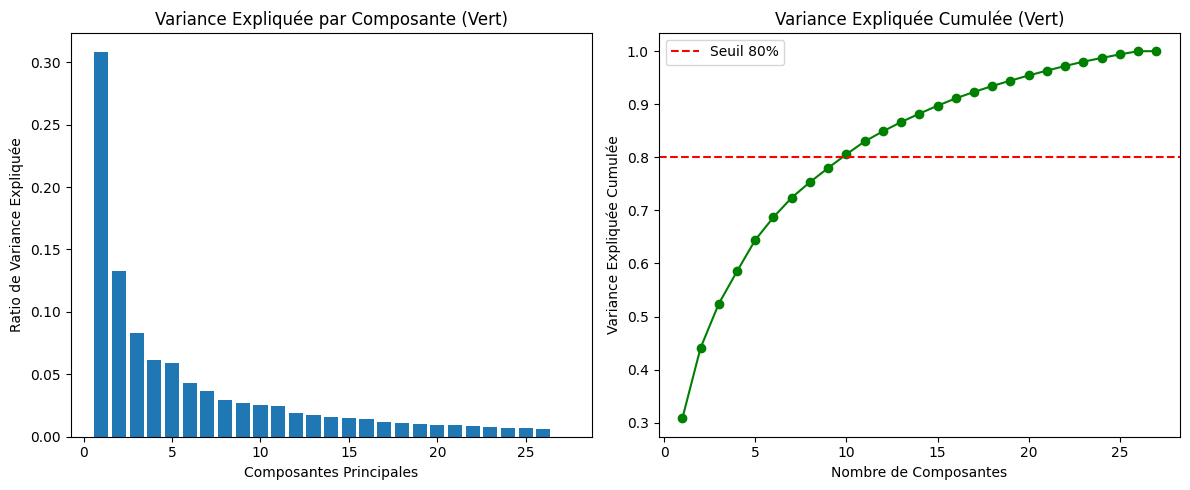


Importance des composantes principales (Vert):
PC1: 0.308 (30.8%)
PC2: 0.133 (13.3%)
PC3: 0.083 (8.3%)
PC4: 0.061 (6.1%)
PC5: 0.059 (5.9%)
PC6: 0.043 (4.3%)
PC7: 0.037 (3.7%)
PC8: 0.029 (2.9%)
PC9: 0.027 (2.7%)
PC10: 0.026 (2.6%)
PC11: 0.024 (2.4%)
PC12: 0.019 (1.9%)
PC13: 0.017 (1.7%)
PC14: 0.016 (1.6%)
PC15: 0.015 (1.5%)
PC16: 0.014 (1.4%)
PC17: 0.012 (1.2%)
PC18: 0.011 (1.1%)
PC19: 0.010 (1.0%)
PC20: 0.010 (1.0%)
PC21: 0.009 (0.9%)
PC22: 0.009 (0.9%)
PC23: 0.008 (0.8%)
PC24: 0.007 (0.7%)
PC25: 0.007 (0.7%)
PC26: 0.006 (0.6%)
PC27: 0.000 (0.0%)

Variables les plus importantes par composante principale (Vert):

PC1:
C1_8_slice: 0.290
C1_9_slice: 0.287
C1_7_slice: 0.287
C1_3_slice: 0.286
C1_1_slice: 0.282

PC2:
A8_1_slice: 0.439
A8_3_slice: 0.434
A8_2_slice: 0.416
A8_4_slice: 0.347
A11: 0.263

PC3:
A11: 0.406
A12: -0.366
B1_2_slice: -0.314
A4: -0.299
B2_2_slice: -0.288


In [23]:
# Pour les données orange
pca = PCA()
pca_orange = pca.fit(data_orange_scaled)

# Calcul de la variance expliquée cumulée
var_ratio_orange = np.cumsum(pca.explained_variance_ratio_)

# Création du graphique pour les données orange
plt.figure(figsize=(12, 5))

# Plot de la variance expliquée par composante
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée')
plt.title('Variance Expliquée par Composante (Orange)')

# Plot de la variance expliquée cumulée
plt.subplot(1, 2, 2)
plt.plot(range(1, len(var_ratio_orange) + 1), var_ratio_orange, 'bo-')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Variance Expliquée Cumulée (Orange)')
plt.axhline(y=0.8, color='r', linestyle='--', label='Seuil 80%')
plt.legend()

plt.tight_layout()
plt.show()

# Afficher les composantes principales et leur importance
print("\nImportance des composantes principales (Orange):")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

# Afficher les variables les plus importantes pour chaque composante principale
n_components = 3  # Nombre de composantes à afficher
n_top_features = 5  # Nombre de variables les plus importantes à afficher

print("\nVariables les plus importantes par composante principale (Orange):")
for i in range(n_components):
    print(f"\nPC{i+1}:")
    # Obtenir les indices triés des coefficients les plus importants
    sorted_idx = np.abs(pca.components_[i]).argsort()[::-1]
    for j in range(n_top_features):
        print(f"{variables_orange[sorted_idx[j]]}: {pca.components_[i][sorted_idx[j]]:.3f}")

# Répéter pour les données vertes
pca = PCA()
pca_vert = pca.fit(data_vert_scaled)
var_ratio_vert = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée')
plt.title('Variance Expliquée par Composante (Vert)')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(var_ratio_vert) + 1), var_ratio_vert, 'go-')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Variance Expliquée Cumulée (Vert)')
plt.axhline(y=0.8, color='r', linestyle='--', label='Seuil 80%')
plt.legend()

plt.tight_layout()
plt.show()

print("\nImportance des composantes principales (Vert):")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

print("\nVariables les plus importantes par composante principale (Vert):")
for i in range(n_components):
    print(f"\nPC{i+1}:")
    sorted_idx = np.abs(pca.components_[i]).argsort()[::-1]
    for j in range(n_top_features):
        print(f"{variables_vert[sorted_idx[j]]}: {pca.components_[i][sorted_idx[j]]:.3f}")

Statistiques pour les clusters orange:
Variance intra-groupe: 119155.14
Variance inter-groupe: 65836.39
Ratio variance inter/intra: 0.55

Ce ratio représente 35.6% de la variance totale

Statistiques pour les clusters verts:
Variance intra-groupe: 79537.54
Variance inter-groupe: 50462.46
Ratio variance inter/intra: 0.63

Ce ratio représente 38.8% de la variance totale


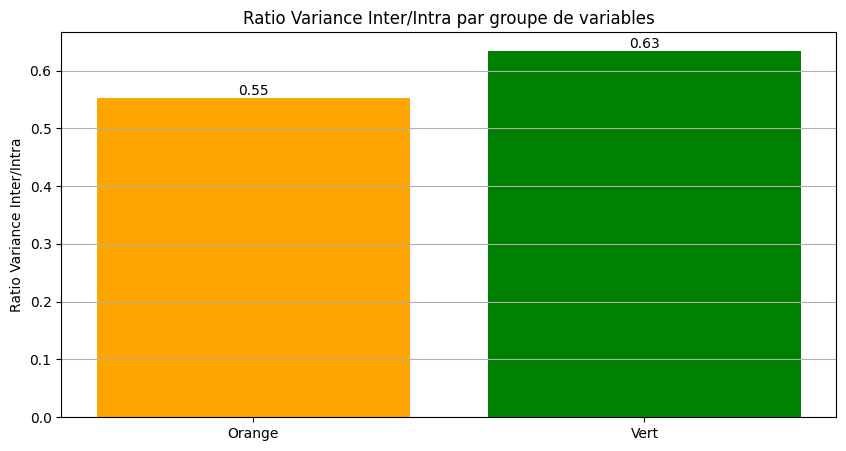

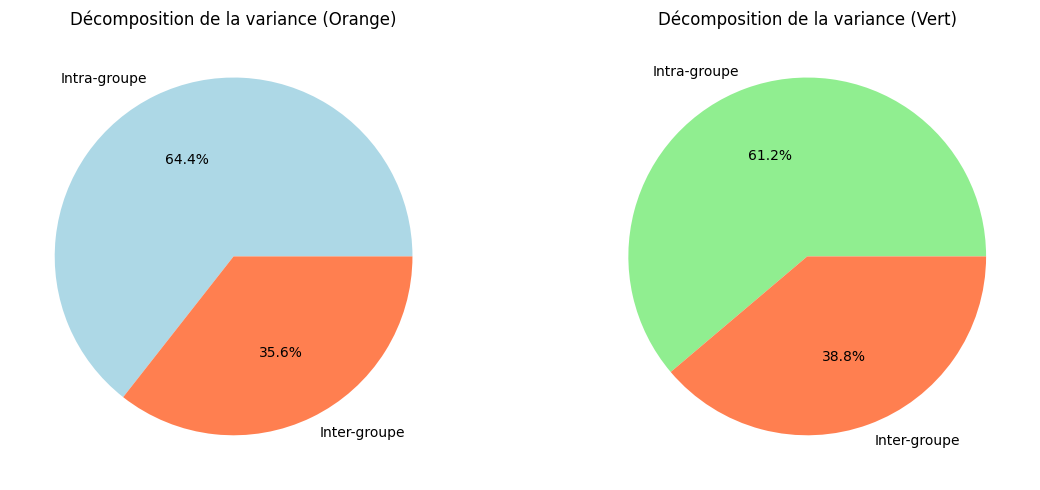

In [24]:
def calculate_variance_ratio(data, cluster_labels, cluster_centers):
    # Calcul de la variance intra-groupe
    intra_cluster_var = 0
    n_samples = data.shape[0]
    
    # Pour chaque point, calculer la distance au carré avec son centre de cluster
    for i in range(n_samples):
        cluster_center = cluster_centers[cluster_labels[i]]
        dist = np.sum((data[i] - cluster_center) ** 2)
        intra_cluster_var += dist
    
    # Moyenne globale des données
    global_mean = np.mean(data, axis=0)
    
    # Calcul de la variance inter-groupe
    inter_cluster_var = 0
    unique_labels = np.unique(cluster_labels)
    
    for label in unique_labels:
        # Points dans le cluster actuel
        cluster_points = data[cluster_labels == label]
        n_points = len(cluster_points)
        
        # Distance au carré entre le centre du cluster et la moyenne globale
        dist = np.sum((cluster_centers[label] - global_mean) ** 2)
        inter_cluster_var += n_points * dist
    
    # Calcul du ratio
    variance_ratio = inter_cluster_var / intra_cluster_var if intra_cluster_var != 0 else float('inf')
    
    return {
        'intra_cluster_variance': intra_cluster_var,
        'inter_cluster_variance': inter_cluster_var,
        'variance_ratio': variance_ratio
    }

# Application aux données orange
kmeans_orange = KMeans(n_clusters=4, random_state=42)
clusters_orange = kmeans_orange.fit_predict(data_orange_scaled)
variance_stats_orange = calculate_variance_ratio(
    data_orange_scaled, 
    clusters_orange, 
    kmeans_orange.cluster_centers_
)

# Application aux données vertes
kmeans_vert = KMeans(n_clusters=5, random_state=42)
clusters_vert = kmeans_vert.fit_predict(data_vert_scaled)
variance_stats_vert = calculate_variance_ratio(
    data_vert_scaled, 
    clusters_vert, 
    kmeans_vert.cluster_centers_
)

# Affichage des résultats
print("Statistiques pour les clusters orange:")
print(f"Variance intra-groupe: {variance_stats_orange['intra_cluster_variance']:.2f}")
print(f"Variance inter-groupe: {variance_stats_orange['inter_cluster_variance']:.2f}")
print(f"Ratio variance inter/intra: {variance_stats_orange['variance_ratio']:.2f}")
print("\nCe ratio représente {:.1f}% de la variance totale".format(
    100 * variance_stats_orange['variance_ratio'] / (1 + variance_stats_orange['variance_ratio'])
))

print("\nStatistiques pour les clusters verts:")
print(f"Variance intra-groupe: {variance_stats_vert['intra_cluster_variance']:.2f}")
print(f"Variance inter-groupe: {variance_stats_vert['inter_cluster_variance']:.2f}")
print(f"Ratio variance inter/intra: {variance_stats_vert['variance_ratio']:.2f}")
print("\nCe ratio représente {:.1f}% de la variance totale".format(
    100 * variance_stats_vert['variance_ratio'] / (1 + variance_stats_vert['variance_ratio'])
))

# Visualisation des ratios
plt.figure(figsize=(10, 5))
labels = ['Orange', 'Vert']
ratios = [variance_stats_orange['variance_ratio'], variance_stats_vert['variance_ratio']]

plt.bar(labels, ratios, color=['orange', 'green'])
plt.title('Ratio Variance Inter/Intra par groupe de variables')
plt.ylabel('Ratio Variance Inter/Intra')
plt.grid(True, axis='y')

# Ajout des valeurs sur les barres
for i, v in enumerate(ratios):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Visualisation de la décomposition de la variance
plt.figure(figsize=(12, 5))

# Pour les clusters orange
plt.subplot(1, 2, 1)
variances_orange = [variance_stats_orange['intra_cluster_variance'], 
                   variance_stats_orange['inter_cluster_variance']]
plt.pie(variances_orange, labels=['Intra-groupe', 'Inter-groupe'], 
        autopct='%1.1f%%', colors=['lightblue', 'coral'])
plt.title('Décomposition de la variance (Orange)')

# Pour les clusters verts
plt.subplot(1, 2, 2)
variances_vert = [variance_stats_vert['intra_cluster_variance'], 
                 variance_stats_vert['inter_cluster_variance']]
plt.pie(variances_vert, labels=['Intra-groupe', 'Inter-groupe'], 
        autopct='%1.1f%%', colors=['lightgreen', 'coral'])
plt.title('Décomposition de la variance (Vert)')

plt.tight_layout()
plt.show()

In [25]:
def describe_clusters(data, cluster_labels, variable_names):
    for cluster_id in np.unique(cluster_labels):
        # Sélectionner les données du cluster
        cluster_data = data[cluster_labels == cluster_id]
        
        print(f"\nCluster {cluster_id} ({len(cluster_data)} individus):")
        
        # Calculer les moyennes des variables pour ce cluster
        cluster_means = np.mean(cluster_data, axis=0)
        global_means = np.mean(data, axis=0)
        
        # Identifier les caractéristiques distinctives
        distinctive_features = []
        for i, (c_mean, g_mean, var_name) in enumerate(zip(cluster_means, global_means, variable_names)):
            diff = c_mean - g_mean
            if abs(diff) > 0.5:  # Seuil arbitraire, à ajuster
                distinctive_features.append((var_name, diff))
        
        # Trier et afficher les caractéristiques les plus distinctives
        distinctive_features.sort(key=lambda x: abs(x[1]), reverse=True)
        print("Caractéristiques distinctives:")
        for var_name, diff in distinctive_features[:5]:  # Top 5 caractéristiques
            direction = "supérieure" if diff > 0 else "inférieure"
            print(f"- {var_name}: {abs(diff):.2f} écarts-types {direction} à la moyenne")

# Pour les clusters orange
print("Description des clusters orange:")
describe_clusters(data_orange_scaled, clusters_orange, variables_orange)

# Pour les clusters verts
print("\nDescription des clusters verts:")
describe_clusters(data_vert_scaled, clusters_vert, variables_vert)

Description des clusters orange:

Cluster 0 (1157 individus):
Caractéristiques distinctives:
- A11_8_slice: 1.00 écarts-types inférieure à la moyenne
- A11_5_slice: 0.99 écarts-types inférieure à la moyenne
- A11_7_slice: 0.99 écarts-types inférieure à la moyenne
- A11_3_slice: 0.98 écarts-types inférieure à la moyenne
- A11_10_slice: 0.97 écarts-types inférieure à la moyenne

Cluster 1 (355 individus):
Caractéristiques distinctives:
- A11_5_slice: 1.85 écarts-types supérieure à la moyenne
- A11_7_slice: 1.81 écarts-types supérieure à la moyenne
- A11_10_slice: 1.77 écarts-types supérieure à la moyenne
- A11_3_slice: 1.76 écarts-types supérieure à la moyenne
- A11_1_slice: 1.70 écarts-types supérieure à la moyenne

Cluster 2 (1464 individus):
Caractéristiques distinctives:
- A9_3_slice: 0.66 écarts-types supérieure à la moyenne
- A9_8_slice: 0.66 écarts-types supérieure à la moyenne
- A9_4_slice: 0.65 écarts-types supérieure à la moyenne
- A9_2_slice: 0.62 écarts-types supérieure à la 